In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
iris, iris_info = tfds.load('iris', with_info=True)
print(iris_info)

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.0.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_path='C:\\Users\\maxim.korolev\\tensorflow_datasets\\iris\\2.0.0',
    download_size=4.44 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitI

In [5]:
tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)
ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label']))
ds_test = ds_test.map(
    lambda x: (x['features'], x['label']))
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid',
                          name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, name='fc2',
                          activation='softmax')])
iris_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [7]:
iris_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [9]:
import numpy as np

num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)
ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)
history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch,
                         verbose=0)

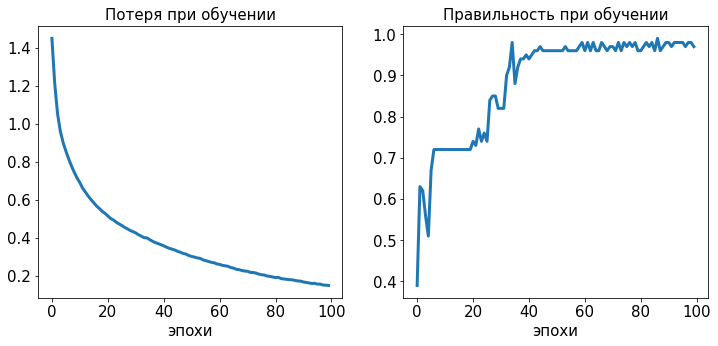

In [13]:
from matplotlib import pyplot as plt

hist = history.history
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Пoтepя при обучении', size=15)
ax.set_xlabel('эпoxи', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Правильность при обучении', size=15)
ax.set_xlabel('эпохи', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [14]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('Потеря при испытании: {:.4f} Правильность при испытании: {:.4f}'.format(*results))

Потеря при испытании: 0.1485 Правильность при испытании: 0.9800


In [15]:
iris_model.save('iris-classifier.h5',
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

In [16]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')
iris_model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [17]:
results = iris_model_new.evaluate(ds_test.batch(33), verbose=0)
print('Потеря при испытании: {:.4f} Правильность при испытании: {:.4f}'.format(*results))

Потеря при испытании: 0.1485 Правильность при испытании: 0.9800
